In [7]:
!pip install pymupdf
!pip install textblob
!pip install nltk

In [3]:
import fitz  # PyMuPDF
import pandas as pd
import fitz  # PyMuPDF
import re
import pandas as pd
from nltk.tokenize import sent_tokenize
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import os
import nltk
import collections
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from textblob import TextBlob
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\divya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\divya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\divya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\divya\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [10]:
pdf_path = "C:\\Users\\divya\\Downloads\\transcript\\files\\PRAJINDUSTRIES_PRAJIND.NS_06-02-2023.pdf"
pdf_reader = fitz.open(pdf_path)
pdf_text = ''

for page_num in range(len(pdf_reader)):
    page = pdf_reader[page_num]
    pdf_text += page.get_text()
    
    

In [11]:
def remove_all_caps(text):
  """Removes all words that are in all caps from a string."""
  words = text.split(" ")
  new_words = []
  for word in words:
    if not word.isupper():
      new_words.append(word)
  return " ".join(new_words)

def remove_names(text):
  """Removes all names from a string."""
  names = re.compile(r"[A-Z][a-z]+")
  return names.sub("", text)

def remove_extra_spaces(text):
  """Removes extra spaces from a string."""
  return re.sub(r"\s+", " ", text)

def remove_sentences_with_commas(text):
  """Removes sentences which just have "," and no words."""
  sentences = text.split(".")
  new_sentences = []
  for sentence in sentences:
    if len(sentence.split(",")) == 1:
      continue
    new_sentences.append(sentence)
  return new_sentences


def most_frequent_words(text):
  """Finds the most frequent words in a text."""
  words = text.split(" ")
  counts = collections.Counter(words)
  most_common = counts.most_common(50)
  return most_common

def remove_stopwords(text):
  """Removes stopwords from a text."""
  stopwords = nltk.corpus.stopwords.words("english")
  words = text.split(" ")
  new_words = []
  for word in words:
    if word not in stopwords:
      new_words.append(word)
  return " ".join(new_words)

def join_short_sentences(sentences):
  """
  Joins sentences which are less than or equal to 3 words to append to the previous sentence.

  Args:
    sentences: A list of sentences.

  Returns:
    A list of joined sentences.
  """

  joined_sentences = []
  current_sentence = ""
  for sentence in sentences:
    if len(sentence.split()) <= 5:
      current_sentence += " " + sentence
    else:
      if current_sentence:
        joined_sentences.append(current_sentence)
      current_sentence = sentence

  if current_sentence:
    joined_sentences.append(current_sentence)
    #text = joined_sentences
  return joined_sentences

def lemmatize(text):
    """Lemmatize a text string.

    Args:
        text (str): The text string to lemmatize.

    Returns:
        str: The lemmatized text string.
    """

    lemmatizer = nltk.stem.WordNetLemmatizer()
    return lemmatizer.lemmatize(text)



In [12]:
text = re.sub(r'Page \d+ of \d+', '', pdf_text)
text = remove_all_caps(text)
text = remove_names(text)
text = re.sub(r'–', '-', text)
text = re.sub(r'[^a-zA-Z0-9\s.,!?]', '', text)
text = re.sub(r'good (morning|evening|afternoon)', '', text, flags=re.IGNORECASE)    
text = re.sub(r'thank you', '', text, flags=re.IGNORECASE)
text = re.sub(r'evening', '', text, flags=re.IGNORECASE)
text = re.sub(r'morning', '', text, flags=re.IGNORECASE)
text = re.sub(r'afternoon', '', text, flags=re.IGNORECASE)
text = re.sub(r'ladies and gentlemen[.,]*', '', text, flags=re.IGNORECASE)
text = re.sub(r'welcome', '', text, flags=re.IGNORECASE)
text = re.sub(r'question', '', text, flags=re.IGNORECASE)
text = re.sub(r'conference call', '', text, flags=re.IGNORECASE)
text = re.sub(r'conference', '', text, flags=re.IGNORECASE)
text = re.sub(r'call', '', text, flags=re.IGNORECASE)
text = re.sub(r'record', '', text, flags=re.IGNORECASE)
text = re.sub(r'recorded', '', text, flags=re.IGNORECASE)
text = re.sub(r'last question', '', text, flags=re.IGNORECASE)
text = re.sub(r'please', '', text, flags=re.IGNORECASE)
text = re.sub(r'go ahead', '', text, flags=re.IGNORECASE)
text = re.sub(r'page', '', text, flags=re.IGNORECASE)
text = re.sub(r'you', '', text, flags=re.IGNORECASE)
text = re.sub(r"\s+", " ", text)
text = remove_stopwords(text)
text = lemmatize(text)
#text = re.sub(r'\s+', ' ', text)


In [ ]:
#sentences = join_short_sentences(sentences)

In [ ]:
#sentences = remove_sentences_with_commas(text)

In [7]:
print(text)

 gentlemen, earnings . management team, us today, . , . , . , . , . begin, quick announcements attendees. said reflects outlook future, could construed forwardlooking statement may involve risks uncertainties. statements comments guarantees future performance, actual results may differ statements. , note earnings scheduled duration 45 minutes, starting directly section . wish ask , use raise hand feature available r dashboard. announce r name unmute r line, post proceed r . wait minute queue assembles. first line . . . , team, couple s. , food delivery side. progress margins front, think balance growth profitability quarter seen losses coming quite bit, growth also modest 3 quarteronquarter. think coming quarters mediumterm standpoint? , r , side. way thinking essentially focus good quality growth well profitability. yes, right, quarter growth low, largely traded lower quality growth business favor economics. far good quality growth concerned, define good quality acquire users going pr

In [13]:

sentences = sent_tokenize(text)
# Remove stopwords and punctuations
stop_words = set(stopwords.words('english'))
filtered_sentences = []
for sent in sentences:
    words = word_tokenize(sent)
    filtered_words = [word for word in words if word.lower() not in stop_words and word.isalnum()]
    filtered_sentences.append(' '.join(filtered_words))
    filtered_sentences = join_short_sentences(filtered_sentences)
    

In [ ]:
# Perform sentiment analysis
sentiments = {'positive': 0, 'neutral': 0, 'negative': 0}
for sent in filtered_sentences:
    blob = TextBlob(sent)
    polarity = blob.sentiment.polarity
    if polarity > 0.2:
        sentiments['positive'] += 1
    elif polarity == 0:
        sentiments['neutral'] += 1
    else:
        sentiments['negative'] += 1

# Display the sentiment analysis results
sentiments

In [35]:

# Calculate the total number of sentences
total_sentences = sentiments['positive'] + sentiments['neutral'] + sentiments['negative']

# Calculate the percentage of positive, neutral, and negative sentences
positive_percent = (sentiments['positive'] / total_sentences) * 100
neutral_percent = (sentiments['neutral'] / total_sentences) * 100
negative_percent = (sentiments['negative'] / total_sentences) * 100

# Calculate the overall sentiment score
overall_score = neutral_percent + positive_percent - negative_percent

# Display the calculated percentages and overall score
positive_percent, neutral_percent, negative_percent, overall_score

(24.84472049689441, 37.88819875776397, 37.267080745341616, 25.465838509316768)

In [14]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from transformers import AutoModelForSequenceClassification, AutoTokenizer
import torch
import numpy
import math 
import transformers
# Initialize VADER sentiment analyzer
vader_analyzer = SentimentIntensityAnalyzer()
vader_polarity_list = []  
vader_labels = []  
textblob_polarity_list = []
textblob_labels = []
finbert_polarity_list = []  
finbert_labels = []  

# Initialize FinBERT sentiment analyzer
finbert_model = AutoModelForSequenceClassification.from_pretrained('yiyanghkust/finbert-tone', num_labels=3)
finbert_tokenizer = AutoTokenizer.from_pretrained('yiyanghkust/finbert-tone')

import torch
from transformers import AutoModelForSequenceClassification
model = AutoModelForSequenceClassification.from_pretrained("yiyanghkust/finbert-tone",num_labels=3)
tokenizer = AutoTokenizer.from_pretrained("yiyanghkust/finbert-tone")
def get_finbert_sentiment(text):

    label_list=['positive','negative','neutral']

    ml_polarity = []
    ml_sent = []
    
    for i in text:
        if i == str(numpy.nan):
            ml_sent.append('neutral')
            ml_polarity.append(0)
        else:
            inputs = finbert_tokenizer(i, return_tensors="pt", truncation=True)
            outputs = model(**inputs)
            prob_0 = math.exp(outputs.logits[0][0]) / (1 + math.exp(outputs.logits[0][0]))
            prob_1 = math.exp(outputs.logits[0][1]) / (1 + math.exp(outputs.logits[0][1]))
            polarity_score = prob_0 - prob_1

            # Custom threshold for determining sentiment
            if polarity_score > 0.5:
                ml_sent.append('positive')
            elif polarity_score < -0.5:
                ml_sent.append('negative')
            else:
                ml_sent.append('neutral')

            ml_polarity.append(polarity_score)
    
    return ml_polarity , ml_sent


# Perform sentiment analysis using VADER and FinBERT
vader_sentiments = {'positive': 0, 'neutral': 0, 'negative': 0}
finbert_sentiments = {'positive': 0, 'neutral': 0, 'negative': 0}
textblob_sentiments = {'positive': 0, 'neutral': 0, 'negative': 0}

        

def calculate_weighted_average(sentiment_counts, polarity_list, labels):
    """
    Calculate weighted average sentiment score.

    Parameters:
    - sentiment_counts (dict): Dictionary containing the counts of each sentiment label.
    - polarity_list (list): List of polarity scores for each sentence.
    - labels (list): List of sentiment labels for each sentence.

    Returns:
    - weighted_avg (float): The weighted average sentiment score.
    """
    
    # Calculate the total number of sentences
    total_sentences = sum(sentiment_counts.values())
    
    # Initialize the sum for the weighted average calculation
    weighted_sum = 0.0
    
    # If there are no sentences, return 0
    if total_sentences == 0:
        return 0.0
    
    for sentiment, count in sentiment_counts.items():
        # Calculate the average polarity for the current sentiment label
        avg_polarity = sum(polarity for polarity, label in zip(polarity_list, labels) if label == sentiment) / count if count > 0 else 0.0
        
        # Add to the weighted sum
        weighted_sum += avg_polarity * count
    
    # Calculate the weighted average
    weighted_avg = weighted_sum / total_sentences
    
    return weighted_avg

for sent in filtered_sentences:
    # VADER
    vader_score = vader_analyzer.polarity_scores(sent)['compound']
    if vader_score > 0.5:
        vader_sentiments['positive'] += 1
        vader_labels.append('positive')
    elif vader_score == 0:
        vader_sentiments['neutral'] += 1
        vader_labels.append('neutral')
    else:
        vader_sentiments['negative'] += 1
        vader_labels.append('negative')
    vader_polarity_list.append(vader_score)

    # FinBERT
    finbert_polarity, finbert_label = get_finbert_sentiment([sent])
    finbert_polarity_list.extend(finbert_polarity)
    finbert_labels.extend(finbert_label)
    for label in finbert_label:
        finbert_sentiments[label] += 1
    # TextBlob
    blob = TextBlob(sent)
    polarity = blob.sentiment.polarity
    if polarity > 0.5:
        textblob_sentiments['positive'] += 1
        textblob_labels.append('positive')
    elif polarity == 0:
        textblob_sentiments['neutral'] += 1
        textblob_labels.append('neutral')
    else:
        textblob_sentiments['negative'] += 1
        textblob_labels.append('negative')
    textblob_polarity_list.append(polarity)

# Display the sentiment analysis results
vader_sentiments, finbert_sentiments

# Calculate weighted averages
vader_weighted_avg = calculate_weighted_average(vader_sentiments, vader_polarity_list, vader_labels)
finbert_weighted_avg = calculate_weighted_average(finbert_sentiments, finbert_polarity_list, finbert_labels)
textblob_weighted_avg = calculate_weighted_average(textblob_sentiments, textblob_polarity_list, textblob_labels)

# Display the results
print("VADER Weighted Average:", vader_weighted_avg)
print("FinBERT Weighted Average:", finbert_weighted_avg)
print("TextBlob Weighted Average:", textblob_weighted_avg)



Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


VADER Weighted Average: 0.3374717557251909
FinBERT Weighted Average: 0.5095118650907019
TextBlob Weighted Average: 0.12828294679541954


In [37]:
combined = (vader_weighted_avg+finbert_weighted_avg+textblob_weighted_avg)/3
combined

0.26596255732153523

In [21]:
# Calculate the frequency of each sentiment for each model
vader_counts = {}
finbert_counts = {}

for sentiment in ['positive', 'neutral', 'negative']:
  vader_counts[sentiment] = vader_sentiments[sentiment]
  finbert_counts[sentiment] = finbert_sentiments[sentiment]

# Calculate the weighted average score for each model based on frequency
def calculate_weighted_avg_score(counts):
  total_weight = sum(counts.values())
  weighted_avg_score = 0
  for sentiment, count in counts.items():
    weighted_avg_score += count / total_weight * (2 * sentiment - 1)
  return weighted_avg_score

vader_weighted_avg_score = calculate_weighted_avg_score(vader_counts)
finbert_weighted_avg_score = calculate_weighted_avg_score(finbert_counts)

# Display the weighted average score for each model
print('VADER weighted average score:', vader_weighted_avg_score)
print('FinBERT weighted average score:', finbert_weighted_avg_score)

TypeError: unsupported operand type(s) for -: 'str' and 'int'

In [39]:
# Sentiment counts obtained from VADER and FinBERT
vader_counts = vader_sentiments
finbert_counts = finbert_sentiments

# Function to calculate sentiment percentages and overall score
def calculate_sentiment_metrics(counts):
    total = sum(counts.values())
    percentages = {k: (v / total) * 100 for k, v in counts.items()}
    overall_score = percentages['neutral'] + percentages['positive'] - percentages['negative']
    return percentages, overall_score

# Calculate sentiment metrics for TextBlob, VADER, and FinBERT
textblob_metrics, textblob_score = calculate_sentiment_metrics(sentiments)
vader_metrics, vader_score = calculate_sentiment_metrics(vader_counts)
finbert_metrics, finbert_score = calculate_sentiment_metrics(finbert_counts)

# Display the calculated metrics and overall scores
textblob_metrics, textblob_score, vader_metrics, vader_score, finbert_metrics, finbert_score

({'positive': 24.84472049689441,
  'neutral': 37.88819875776397,
  'negative': 37.267080745341616},
 25.465838509316768,
 {'positive': 59.006211180124225,
  'neutral': 16.149068322981368,
  'negative': 24.84472049689441},
 50.31055900621118,
 {'positive': 63.35403726708074,
  'neutral': 8.074534161490684,
  'negative': 28.57142857142857},
 42.85714285714286)

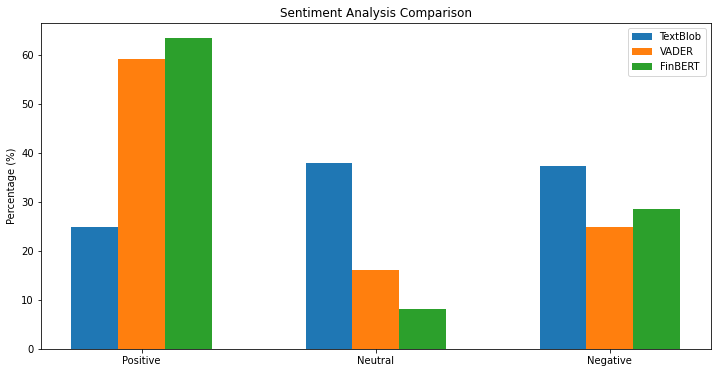

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
labels = ['Positive', 'Neutral', 'Negative']
textblob_values = [textblob_metrics['positive'], textblob_metrics['neutral'], textblob_metrics['negative']]
vader_values = [vader_metrics['positive'], vader_metrics['neutral'], vader_metrics['negative']]
finbert_values = [finbert_metrics['positive'], finbert_metrics['neutral'], finbert_metrics['negative']]

# Set up the figure and axis
x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots(figsize=(12, 6))

# Plotting
rects1 = ax.bar(x - width, textblob_values, width, label='TextBlob')
rects2 = ax.bar(x, vader_values, width, label='VADER')
rects3 = ax.bar(x + width, finbert_values, width, label='FinBERT')

# Add some text for labels, title and custom x-axis tick labels
ax.set_ylabel('Percentage (%)')
ax.set_title('Sentiment Analysis Comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Show the plot
plt.show()

In [ ]:
import pandas as pd

# Create a dictionary to store the sentiment scores
sentiments = {'VADER': {}, 'FinBERT': {}, 'TextBlob': {}}

# Iterate over the sentences and add the sentiment scores to the dictionary
for sent in filtered_sentences:
    vader_score = vader_analyzer.polarity_scores(sent)['compound']
    finbert_label = get_finbert_sentiment(sent)
    textblob_polarity = TextBlob(sent).sentiment.polarity

    sentiments['VADER'][sent] = vader_score
    sentiments['FinBERT'][sent] = finbert_label
    sentiments['TextBlob'][sent] = textblob_polarity

# Create a Pandas DataFrame
df = pd.DataFrame(sentiments)




In [ ]:
# Display the DataFrame
df.to_excel('results.xlsx')

In [ ]:
print(df)